In [18]:
import numpy as np
from numpy import genfromtxt, savetxt

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import  PCA
import sklearn
from sklearn.manifold import TSNE

import matplotlib.pyplot as plt
import matplotlib
from mpl_toolkits import mplot3d
import matplotlib.patches as mpatches

import pandas as pd

import scipy.linalg as la

class schnet_analyzer:
    def __init__(self,element,file_path,label,data):
        self.element = element
        self.file_path = file_path
        self.label = label
        self.data = data
        
    def colors(self):
        #hydrogen
        methyl = mpatches.Patch(color='skyblue', label='methyl')
        methylene = mpatches.Patch(color='green', label='methylene')
        methine = mpatches.Patch(color='lime',label='methine')
        alkene = mpatches.Patch(color='tan',label='alkene')
        primaryamine = mpatches.Patch(color='tomato',label='primary-amine')
        secondaryamine = mpatches.Patch(color='chocolate',label='secondary-amine')
        alcohols = mpatches.Patch(color='teal',label='alcohols')
        methylO = mpatches.Patch(color='gold',label='methyl-O')
        methylN = mpatches.Patch(color='pink',label='methyl-N')
        methyleneN = mpatches.Patch(color='orange',label='methylene-N')
        methyleneO = mpatches.Patch(color='blue',label='methylene-O')
        methineN = mpatches.Patch(color='cyan',label='methine-N')
        methineO = mpatches.Patch(color='grey',label='methine-O')
        alkeneO = mpatches.Patch(color='lightsteelblue',label='alkene-O')
        alkeneN = mpatches.Patch(color='navy',label='alkene-N')
        HCOO = mpatches.Patch(color='violet',label='H-COO')
        HCON = mpatches.Patch(color='palegreen',label = 'H-CON')
        ammonium = mpatches.Patch(color='purple',label='H3N+-C')
        imine = mpatches.Patch(color='indigo',label='H-N=C')
        
        
        #oxygen
        aldehyde = mpatches.Patch(color='violet', label='aldehyde')
        terminalamide = mpatches.Patch(color='lightgreen', label='terminal-amide')
        terminalester = mpatches.Patch(color='gold',label='terminal-ester')
        internalester = mpatches.Patch(color='pink',label='internal-ester')
        ketone = mpatches.Patch(color='purple',label='ketone')
        internalamide = mpatches.Patch(color='green',label='internal-amide')
        urea = mpatches.Patch(color='darkgreen',label='urea')
        amideester = mpatches.Patch(color='darkseagreen',label='amide-ester')
        primaryalcohol = mpatches.Patch(color='red',label='primary-alcohol')
        secondaryalcohol = mpatches.Patch(color='indianred',label='secondary-alcohol')
        tertiaryalcohol = mpatches.Patch(color='maroon',label='tertiary-alcohol')
        ether = mpatches.Patch(color='orange',label='ether')
        alcoholamine = mpatches.Patch(color='rosybrown',label='alcohol-amine')
        hemiacetal = mpatches.Patch(color='black',label='hemiacetal')
        alcoholalkene = mpatches.Patch(color='skyblue',label='alcohol-akene')
        if element == 'O':
            colors=['tomato','violet','lightgreen','gold','pink',
                'purple','green','darkgreen','brown','lime',
                'cyan','grey','red','indianred','maroon',
                'navy','violet','cornflowerblue','palegreen','lightsalmon',
                'sandybrown','skyblue','lavender','chocolate','black',
                'firebrick','antiquewhite','indigo','teal','bisque',
                'olive','sandybrown','orange','darkseagreen','rosybrown','grey']
            ax1.legend(bbox_to_anchor=(1.5, 1.0),handles=[aldehyde,terminalamide,
                                                         terminalester,internalester,
                                                         ketone,internalamide,
                                                         urea,amideester,primaryalcohol,
                                                         secondaryalcohol,tertiaryalcohol,
                                                         ether,alcoholamine,
                                                         hemiacetal,alcoholalkene])
        if element == 'H':
            colors=['purple','red','orange','gold','pink',
                'green','skyblue','blue','brown','lime',
                'cyan','grey','darkslategrey','tan','lightsteelblue',
                'navy','violet','cornflowerblue','palegreen','lightsalmon',
                'sandybrown','peru','red','tomato','chocolate',
                'khaki','antiquewhite','indigo','teal','red','olive','black','grey']
            ax1.legend(bbox_to_anchor=(1.5, 1.0),handles=[methyl,methylene,
                                                         methine,alkene,
                                                         primaryamine,secondaryamine,
                                                         alcohols,methylO,methylN,
                                                         methyleneN,methyleneO,methineN,methineO,
                                                         alkeneO,alkeneN,HCOO,HCON,ammonium,imine])

        if element == 'N':
            print('not implemented')
        if element == 'C':
            print('not implemented')
        return colors
        
    def pca_analysis(self,data):
        #scale data (if necessary)
        if scale_data == True:
            scaler = StandardScaler()
            scaler.fit(data)
            data = scaler.transform(data)
        #perform PCA decomposition of the data
        pca = PCA(n_components)
        pca.fit(data)
        x_pca = pca.transform(data)
        
        cov = pca.get_covariance()
        eig, ev = la.eig(cov)
        total = sum(eig.real)
        print(eig)
        #plot the PCA if dimension 2 or 3, if element H or O for colors/legend
        x=x_pca
        savetxt('../../../../data/regression_charges/pcah.csv', x, delimiter=',')
        evt=np.transpose(ev)
        unit=np.matmul(ev,evt)
        return x
        
    def tsne_analysis(self,data,dimension,perp):
        #Implementing the TSNE Function - ah Scikit learn makes it so easy!
        x = TSNE(n_components=dimension,perplexity=perp).fit_transform(data)
        if dimension == 2:
            color = schnet_analyzer.colors(element)
            ax4.scatter(x[:,0],x[:,1],x[:,2],c=label['Target'],cmap=matplotlib.colors.ListedColormap(color))
        if dimension == 3:
            color = schnet_analyzer.colors(element)
            ax4.scatter(x[:,0],x[:,1],x[:,2],c=label['Target'],cmap=matplotlib.colors.ListedColormap(color))
            




[8.3773867 +0.j 5.61297248+0.j 3.06397681+0.j 1.80931369+0.j
 1.45764335+0.j 1.40562602+0.j 1.19334007+0.j 1.00703179+0.j
 0.93115068+0.j 0.65252321+0.j 0.61867413+0.j 0.57638176+0.j
 0.43338363+0.j 0.39291071+0.j 0.38591427+0.j 0.29822557+0.j
 0.28689926+0.j 0.23639871+0.j 0.02165625+0.j 0.03605776+0.j
 0.0414876 +0.j 0.0550161 +0.j 0.06696234+0.j 0.20521473+0.j
 0.18444024+0.j 0.16220252+0.j 0.14529155+0.j 0.09880316+0.j
 0.11936156+0.j 0.12458108+0.j]


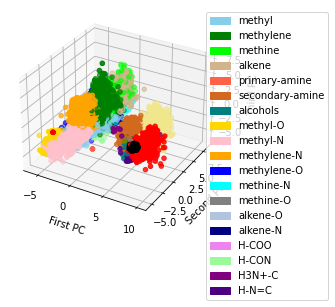

In [19]:
element = 'H' 
file_path = '../../../../data/regression_charges/onU.csv'  
label_path = '../../../../data/regression_charges/label%s.csv' %(element)
AE = genfromtxt('../../../../data/regression_charges/charges.csv', delimiter=',')
label = pd.read_csv(label_path,delimiter=',')
data = genfromtxt(file_path,delimiter=',')
scale_data = True
n_components = 30



ax1 = plt.axes(projection = '3d')
ax1.set_xlabel('First PC')
ax1.set_ylabel('Second PC')
ax1.set_zlabel('Third PC')
color = schnet_analyzer.colors(element)
analysis = schnet_analyzer(element,file_path,label,data)
x = schnet_analyzer.pca_analysis(element,data)
ax1.scatter(x[:,0],x[:,1],x[:,2],c=label['Target'],cmap=matplotlib.colors.ListedColormap(color))


    

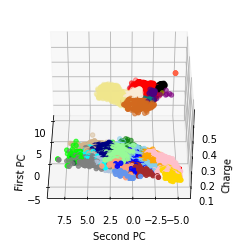

In [15]:

fig3 = plt.subplots()
ax3 = plt.axes(projection='3d')
ax3.set_xlabel('First PC')
ax3.set_ylabel('Second PC')
ax3.set_zlabel('Charge')
ax3.view_init(35,180)
ax3.scatter(x[:,0],x[:,1],AE,c=label['Target'],cmap=matplotlib.colors.ListedColormap(color))
color = schnet_analyzer.colors(element)


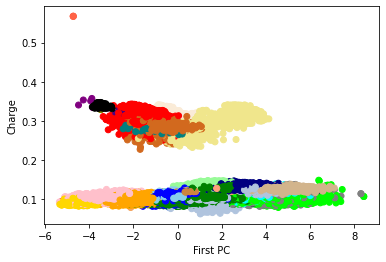

In [12]:
fig2, ax2 = plt.subplots()
ax2.set_xlabel('First PC')
#ax2.set_ylim([-18,-16])
ax2.set_ylabel('Charge')
ax2.scatter(x[:,1],AE,c=label['Target'],cmap=matplotlib.colors.ListedColormap(color))



In [ ]:

perp = 400
dimension=2

x = TSNE(n_components=dimension,perplexity=perp).fit_transform(data)


In [ ]:
fig4 = plt.subplot()
ax4 = plt.axes()
ax4.set_xlabel('t-SNE1')
ax4.set_ylabel('t-SNE2')


if dimension == 2:
    color = schnet_analyzer.colors(element)
    ax4.scatter(x[:,0],x[:,1],c=label['Target'],cmap=matplotlib.colors.ListedColormap(color))
if dimension == 3:
    color = schnet_analyzer.colors(element)
    ax4.scatter(x[:,0],x[:,1],x[:,2],c=label['Target'],cmap=matplotlib.colors.ListedColormap(color))

